# Load the first 9 photos

resource link - https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


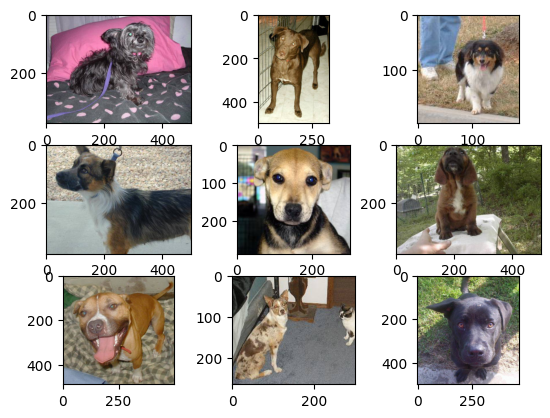

In [11]:
#plot dog photos from dogvs vs cats dataset
import matplotlib.pyplot as plt
from matplotlib.image import imread

#define location of dataset
folder='/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train/'

#plot first new images
for i in range(9):
  #define subplot
  plt.subplot(330+1+i)

  #define filename
  filename=folder + 'dog.' + str(i) + '.jpg'
  #load image pixels
  image=imread(filename)
  #plot raw pixel data
  plt.imshow(image)

plt.show()

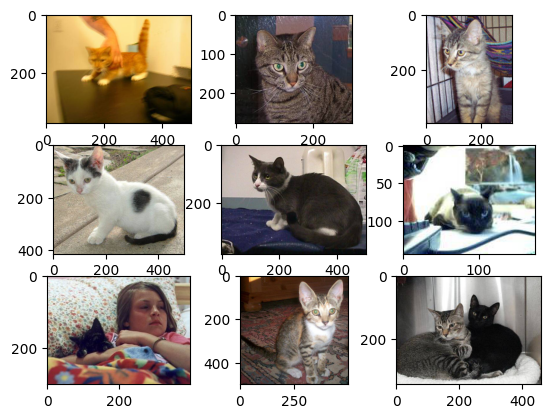

In [12]:
#plot dog photos from dogvs vs cats dataset
import matplotlib.pyplot as plt
from matplotlib.image import imread

#define location of dataset
folder='/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train/'

#plot first new images
for i in range(9):
  #define subplot
  plt.subplot(330+1+i)

  #define filename
  filename=folder + 'cat.' + str(i) + '.jpg'
  #load image pixels
  image=imread(filename)
  #plot raw pixel data
  plt.imshow(image)

plt.show()

# Select Standardized photo size
- photos has to be reshaped prior to modelling, so that all the images have the sames shape , this is often a small square image

- most common is a simple resize operation, that will stretch and deform the aspect ratio of each image and force it to new shape

- smaller inputs mean a model that is faster to train, we will follow and chose a fixed size of 200 x 200 px

In [13]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
#load dogs vs cats dataset, reshape and save to a new file

from os import listdir
from numpy import asarray
from numpy import save
# from keras.preprocessing.image import load_img
from keras.utils import load_img
# from keras.preprocessing.image import img_to_array
from keras.utils import img_to_array

#define location of dataset
folder='/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train/'
photos,labels=list(),list()

#enumerate files in directory
for file in listdir(folder):
  #determine class
  output=0.0
  if file.startswith('dog'):
    output=1.0

  #Load image
  photo=load_img(folder+file,target_size=(200,200)) # resizing the image to a target size (200,200)

  #convert to numpy array
  photo = img_to_array(photo)

  #store
  photos.append(photo)
  labels.append(output)

# convert to a numpy arrays
photos=asarray(photos)
labels=asarray(labels)

# save reshaped photos
save('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/dogs_vs_cats_photos.npy',photos)
save('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/dogs_vs_cats_labels.npy',labels)



In [15]:
#load and confirm the shape
from numpy import load
photos = load('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/dogs_vs_cats_photos.npy')
labels=load('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/dogs_vs_cats_labels.npy')
print(photos.shape,labels.shape)

(2002, 200, 200, 3) (2002,)


# Preprocess photos into standard directoreis

- alternatively, we can load images using `keras ImageDataGenerator` and `flow_from_directory() API`
- this will be slower to execute, but is preferred by more machines 
- this API prefers data to be divided into seperate `train/` and `test/` directories, and under each directory to have subdirectory of each class

- we will randomly select 25% of images to be used in test dataset

- we crate directoreis in python using makedirs function and use loop to create the dog/ and cat/ subdirectores for both train and test directories 



In [18]:
# create directoreis
from os import makedirs

dataset_home='/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/'
subdirs=['train1/','test1/']

for subdir in subdirs:
  #create label subdirs
  labeldirs=['dogs/','cats/']
  for labeldir in labeldirs:
    newdir=dataset_home+subdir+labeldir
    makedirs(newdir,exist_ok=True)

  

In [27]:
from random import seed,random
from shutil import copyfile
# seed random number generator
seed(1)
#define ratio of pictures to use for validation
val_ratio=0.25

#copy training dataset images into subdirectores
src_directory='/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train'

for file in listdir(src_directory):
  src=src_directory+'/' + file
  dest_dir='train1/'
  if random()<val_ratio:
    dest_dir='test1/'
  if file.startswith('cat'):
    dest=dataset_home + dest_dir + 'cats/'+file
    # print(dest)
    copyfile(src,dest)
  elif file.startswith('dog'):
    dest=dataset_home+dest_dir+'dogs/'+file
    # print(dest)
    copyfile(src,dest)


# Develop Baseline CNN Model
- we can develop a baseline convolutional neural network model for dogs vs cats dataset
- a baseline model will establish a minimum model performance to which all of models can be compared, as well as a model architecture that we can use as basis of study and improvement

- a good starting point is general architectural principles of VGG. these are good starting point 

- the architecture involves stacking convolitional layers with small 3x3 filters followed max pooling layers, togethers these layers form a block and these blocks can be repeated where number of filters in each block is increased with depth of network , such as 32,63,128,256 for the first four blocks of the model. Padding is used on convolutional layers to ensure that height and width shapes of output feature maps matches the inputs

- we can explore this architecture on the dogs-vs-cats-problem and compare a model with this architecture with 1,2,3 blocks

- each layer will use `Relu activation function` and `He weight initialization` , which are best practices 

- ex: a ` 3 block VGG style architecture` where each block has a `single convolutional ` and `pooling layer`



In [ ]:
#block1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializater='he_unifrom',padding='same'))
model.add(MaxPooling2D((2,2)))

#block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

#block3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))


## function
- we can create a function named `define_model()` that will define a model and return it to be ready to be fit on the dataset , the function can be customized to define different baseline models, eg versions of model with 1,2,3 VGG style blocks

- model will be fit with stochastic gradient descent and we will start with a conservative leraning rate of 0.001, and momentum of 0.9

- the problem is classification task, requiring prediction of one value of either 0,1. an output layer with 1 node, and a sigmoid activation will be used, model will be optimized using binary cross-entropy-loss function



In [28]:
#define cnn model
def define_model():
  model=Sequential()
  #block1
  model.add(Conv2D(32,(3,3),activation='relu',kernel_initializater='he_unifrom',padding='same'))
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())
  
  model.add(Dense(128,ativation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(1,activation='sigmoid'))

  #compile model
  opt=SGD(lr=0.001,momentum=0.9)

  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model




- model is called to prepare model, next we  need to prepare data
- that involves, first defining instance of ImageDataGenerator, that will scale pixel values to the range of 0-1

In [ ]:
#define model
model= define_model()

In [ ]:
#create data generator
datagen=ImageDataGenerator(rescale=1.0/255.0)

- iterators need to be prepared for both train and test datasets
- we can use it from the `flow_from_directory()` on `data generator` and create one iterator for each of the `train/`  and `test/` , we must specify the problem is a binary classification problem via `class_mode` argument , and to load images with size of `200x200 px` via `target_size` , we will fix `batch_size` 64.

In [ ]:
#prepare iterators
train_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train1/',class_mode='binary',batch_size=64,target_size=(200,200))
test_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/test1/',class_mode='binary',batch_size=64,target_size=(200,200))

- we can then fit the model using train_it and use the test_it as a validation during training

In [ ]:
history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validatio_steps=len(test_it),epochs=20,verbose=1)

- once fit, final model can be evaluated on test data directly and classification accuracy

In [ ]:
# evaluate the model
_,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)
print('> %.3f' % (acc*100.0))

- finally, we create a plot of history during training and stored in history , returned from fit_generator

- history contains the model accuracy and loss on test and train dataset at the end of each epoch, line eplots of these measures over training epochs provide learning curves, using that we can use to get idea of whether model is overfitting ,underfitting or has good fit

- `summary_diagnostics()` is used to take the history directory, create a single figure with a line plot of loss and another for accuracy.

In [3]:
#plot diagnostic learning curves
def summary_diagnostics(history):
  #plot loss
  plt.subplot(211)
  plt.title("cross entropy loss")
  plt.plot(history.history['loss'],color='blue',label='train')
  plt.plot(history.history['val_loss'],color='orange',label='test')

  #plot accuracy
  plt.subplot(212)
  plt.title("classification accuracy")
  plt.plot(history.history['accuracy'],color='blue',label='train')
  plt.plot(history.history['val_accuracy'],color='orange',label='test')

  #save plot to file
  filename=sys.argv[0].split('/')[-1]
  plt.savefig(filename+'_plot.png')
  plt.close()

# complete example of one block baseline model on dogs and cats dataset is

In [6]:
#base line model for dogs vs cats 
import sys
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator 


def define_model():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(1,activation='sigmoid'))

  #compilemodel
  opt=SGD(lr=0.001,momentum=0.9)
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model

#plot diagnostic learning curves
def summary_diagnostics(history):
  #plot loss
  plt.subplot(211)
  plt.title("cross entropy loss")
  plt.plot(history.history['loss'],color='blue',label='train')
  plt.plot(history.history['val_loss'],color='orange',label='test')

  #plot accuracy
  plt.subplot(212)
  plt.title("classification accuracy")
  plt.plot(history.history['accuracy'],color='blue',label='train')
  plt.plot(history.history['val_accuracy'],color='orange',label='test')
  plt.show()

  #save plot to file
  filename=sys.argv[0].split('/')[-1]
  plt.savefig(filename+'_plot.png')
  plt.close()

# run test harness for evalutating model
def run_test_harness():
  #define model
  model=define_model()
  # create data generator
  datagen=ImageDataGenerator(rescale=1.0/255.0)
  #prepare iterators
  train_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train1/',class_mode='binary',batch_size=64,target_size=(200,200))
  test_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/test1/',class_mode='binary',batch_size=64,target_size=(200,200))
  
  #fit model
  history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20,verbose=1) 

  # evaluate the model
  _,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)
  print('> %.3f' % (acc*100.0))

  #learning curves
  summary_diagnostics(history)

#entry point,run test harness
run_test_harness()


Found 1520 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


<ipython-input-6-712ae73ecc2a>:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20,verbose=1)


Epoch 1/20
24/24 [==============================] - 308s 13s/step - loss: 0.8202 - accuracy: 0.5112 - val_loss: 0.6912 - val_accuracy: 0.5311
Epoch 2/20
24/24 [==============================] - 15s 623ms/step - loss: 0.6906 - accuracy: 0.5382 - val_loss: 0.6929 - val_accuracy: 0.5041
Epoch 3/20
24/24 [==============================] - 13s 557ms/step - loss: 0.6860 - accuracy: 0.5539 - val_loss: 0.6886 - val_accuracy: 0.5249
Epoch 4/20
24/24 [==============================] - 10s 440ms/step - loss: 0.6900 - accuracy: 0.5618 - val_loss: 0.7446 - val_accuracy: 0.5270
Epoch 5/20
24/24 [==============================] - 11s 472ms/step - loss: 0.6956 - accuracy: 0.5164 - val_loss: 0.6938 - val_accuracy: 0.4896
Epoch 6/20
24/24 [==============================] - 11s 438ms/step - loss: 0.6843 - accuracy: 0.5507 - val_loss: 0.6889 - val_accuracy: 0.5519
Epoch 7/20
24/24 [==============================] - 11s 480ms/step - loss: 0.6754 - accuracy: 0.5822 - val_loss: 0.6926 - val_accuracy: 0.5456


<ipython-input-6-712ae73ecc2a>:56: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)


8/8 [==============================] - 2s 254ms/step - loss: 0.7227 - accuracy: 0.5975
> 59.751


- model has overfit the training dataset at about 8 epochs , and with accuracy of 59%

## one bloc VGG model 
- has a single convolution layer with 32 filters followed by max pooling layer 

## two block VGG model
- extends one block model and adds a second  block with 64 filters


Found 1520 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-8-e58a156f88d8>:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20,verbose=1)


Epoch 1/20
24/24 [==============================] - 13s 486ms/step - loss: 0.7511 - accuracy: 0.4875 - val_loss: 0.6891 - val_accuracy: 0.5270
Epoch 2/20
24/24 [==============================] - 10s 418ms/step - loss: 0.6901 - accuracy: 0.5151 - val_loss: 0.6894 - val_accuracy: 0.5373
Epoch 3/20
24/24 [==============================] - 10s 418ms/step - loss: 0.6876 - accuracy: 0.5336 - val_loss: 0.7074 - val_accuracy: 0.4751
Epoch 4/20
24/24 [==============================] - 9s 391ms/step - loss: 0.6823 - accuracy: 0.5546 - val_loss: 0.6911 - val_accuracy: 0.5290
Epoch 5/20
24/24 [==============================] - 9s 384ms/step - loss: 0.6702 - accuracy: 0.6250 - val_loss: 0.6823 - val_accuracy: 0.5664
Epoch 6/20
24/24 [==============================] - 11s 483ms/step - loss: 0.6670 - accuracy: 0.6105 - val_loss: 0.6824 - val_accuracy: 0.5851
Epoch 7/20
24/24 [==============================] - 10s 410ms/step - loss: 0.6571 - accuracy: 0.5914 - val_loss: 0.6845 - val_accuracy: 0.5934
E

<ipython-input-8-e58a156f88d8>:56: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)


8/8 [==============================] - 2s 253ms/step - loss: 0.7447 - accuracy: 0.5892
> 58.921


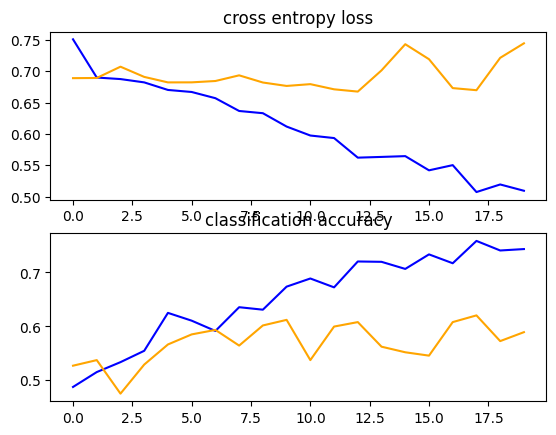

In [8]:
import sys
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator 

def define_model():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(1,activation='sigmoid'))

  opt=SGD(lr=0.001,momentum=0.9)
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model

#plot diagnostic learning curves
def summary_diagnostics(history):
  #plot loss
  plt.subplot(211)
  plt.title("cross entropy loss")
  plt.plot(history.history['loss'],color='blue',label='train')
  plt.plot(history.history['val_loss'],color='orange',label='test')

  #plot accuracy
  plt.subplot(212)
  plt.title("classification accuracy")
  plt.plot(history.history['accuracy'],color='blue',label='train')
  plt.plot(history.history['val_accuracy'],color='orange',label='test')
  plt.show()

  #save plot to file
  filename=sys.argv[0].split('/')[-1]
  plt.savefig(filename+'_plot.png')
  plt.close()

# run test harness for evalutating model
def run_test_harness():
  #define model
  model=define_model()
  # create data generator
  datagen=ImageDataGenerator(rescale=1.0/255.0)
  #prepare iterators
  train_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train1/',class_mode='binary',batch_size=64,target_size=(200,200))
  test_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/test1/',class_mode='binary',batch_size=64,target_size=(200,200))
  
  #fit model
  history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20,verbose=1) 

  # evaluate the model
  _,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)
  print('> %.3f' % (acc*100.0))

  #learning curves
  summary_diagnostics(history)

#entry point,run test harness
run_test_harness()



- model has overfit the training dataset at about 8 epochs, accuracy is 58%

Found 1520 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


<ipython-input-10-0527c5f99c26>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20,verbose=1)


Epoch 1/20
24/24 [==============================] - 12s 461ms/step - loss: 0.6962 - accuracy: 0.5461 - val_loss: 0.6924 - val_accuracy: 0.5415
Epoch 2/20
24/24 [==============================] - 9s 386ms/step - loss: 0.6633 - accuracy: 0.5789 - val_loss: 0.6635 - val_accuracy: 0.5954
Epoch 3/20
24/24 [==============================] - 9s 367ms/step - loss: 0.6334 - accuracy: 0.6197 - val_loss: 0.6995 - val_accuracy: 0.5705
Epoch 4/20
24/24 [==============================] - 10s 410ms/step - loss: 0.5923 - accuracy: 0.6822 - val_loss: 0.6483 - val_accuracy: 0.6079
Epoch 5/20
24/24 [==============================] - 10s 408ms/step - loss: 0.6047 - accuracy: 0.6507 - val_loss: 0.7413 - val_accuracy: 0.5436
Epoch 6/20
24/24 [==============================] - 9s 367ms/step - loss: 0.5851 - accuracy: 0.6803 - val_loss: 0.6382 - val_accuracy: 0.6286
Epoch 7/20
24/24 [==============================] - 10s 412ms/step - loss: 0.5506 - accuracy: 0.7224 - val_loss: 0.6596 - val_accuracy: 0.6328
Ep

<ipython-input-10-0527c5f99c26>:58: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)


8/8 [==============================] - 3s 313ms/step - loss: 0.6948 - accuracy: 0.6680
> 66.805


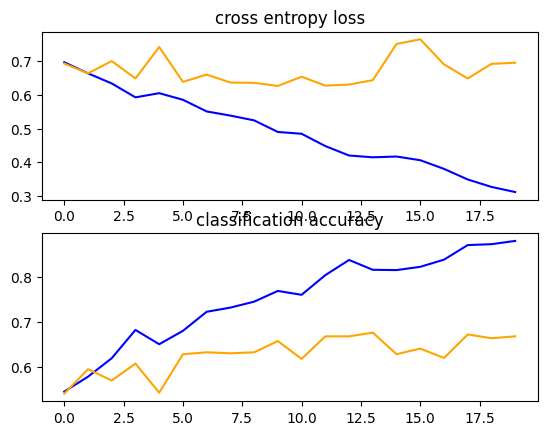

In [10]:
import sys
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator 

def define_model():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(1,activation='sigmoid'))

  opt=SGD(lr=0.001,momentum=0.9)
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model

#plot diagnostic learning curves
def summary_diagnostics(history):
  #plot loss
  plt.subplot(211)
  plt.title("cross entropy loss")
  plt.plot(history.history['loss'],color='blue',label='train')
  plt.plot(history.history['val_loss'],color='orange',label='test')

  #plot accuracy
  plt.subplot(212)
  plt.title("classification accuracy")
  plt.plot(history.history['accuracy'],color='blue',label='train')
  plt.plot(history.history['val_accuracy'],color='orange',label='test')
  plt.show()

  #save plot to file
  filename=sys.argv[0].split('/')[-1]
  plt.savefig(filename+'_plot.png')
  plt.close()

# run test harness for evalutating model
def run_test_harness():
  #define model
  model=define_model()
  # create data generator
  datagen=ImageDataGenerator(rescale=1.0/255.0)
  #prepare iterators
  train_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train1/',class_mode='binary',batch_size=64,target_size=(200,200))
  test_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/test1/',class_mode='binary',batch_size=64,target_size=(200,200))
  
  #fit model
  history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20,verbose=1) 

  # evaluate the model
  _,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)
  print('> %.3f' % (acc*100.0))

  #learning curves
  summary_diagnostics(history)

#entry point,run test harness
run_test_harness()


- accuracy is 66% ,but overfitting shifted to just 2 epochs

# Dropout

- adding dropout of small amount after each VGG block and more dropout applied to fully conected layers near output layer of the model



Found 1520 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


<ipython-input-11-239202adc42b>:63: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20,verbose=1)


Epoch 1/20
24/24 [==============================] - 11s 415ms/step - loss: 0.8271 - accuracy: 0.5263 - val_loss: 0.6906 - val_accuracy: 0.5207
Epoch 2/20
24/24 [==============================] - 10s 391ms/step - loss: 0.6986 - accuracy: 0.5230 - val_loss: 0.6918 - val_accuracy: 0.5353
Epoch 3/20
24/24 [==============================] - 10s 421ms/step - loss: 0.6898 - accuracy: 0.5263 - val_loss: 0.6947 - val_accuracy: 0.4834
Epoch 4/20
24/24 [==============================] - 13s 554ms/step - loss: 0.6886 - accuracy: 0.5434 - val_loss: 0.6907 - val_accuracy: 0.5166
Epoch 5/20
24/24 [==============================] - 12s 516ms/step - loss: 0.6901 - accuracy: 0.5303 - val_loss: 0.6936 - val_accuracy: 0.4751
Epoch 6/20
24/24 [==============================] - 12s 515ms/step - loss: 0.6895 - accuracy: 0.5336 - val_loss: 0.6908 - val_accuracy: 0.5456
Epoch 7/20
24/24 [==============================] - 13s 565ms/step - loss: 0.6852 - accuracy: 0.5599 - val_loss: 0.6914 - val_accuracy: 0.5436

<ipython-input-11-239202adc42b>:66: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)


8/8 [==============================] - 2s 257ms/step - loss: 0.6933 - accuracy: 0.4876
> 48.755


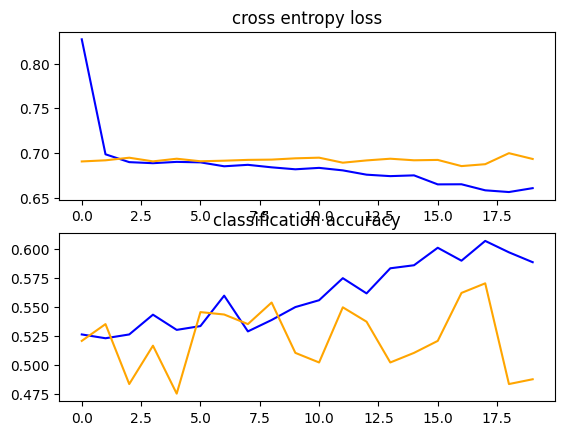

In [11]:
import sys
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator 

def define_model():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dropout(0.5))

  model.add(Dense(1,activation='sigmoid'))

  opt=SGD(lr=0.001,momentum=0.9)
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model

#plot diagnostic learning curves
def summary_diagnostics(history):
  #plot loss
  plt.subplot(211)
  plt.title("cross entropy loss")
  plt.plot(history.history['loss'],color='blue',label='train')
  plt.plot(history.history['val_loss'],color='orange',label='test')

  #plot accuracy
  plt.subplot(212)
  plt.title("classification accuracy")
  plt.plot(history.history['accuracy'],color='blue',label='train')
  plt.plot(history.history['val_accuracy'],color='orange',label='test')
  plt.show()

  #save plot to file
  filename=sys.argv[0].split('/')[-1]
  plt.savefig(filename+'_plot.png')
  plt.close()

# run test harness for evalutating model
def run_test_harness():
  #define model
  model=define_model()
  # create data generator
  datagen=ImageDataGenerator(rescale=1.0/255.0)
  #prepare iterators
  train_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train1/',class_mode='binary',batch_size=64,target_size=(200,200))
  test_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/test1/',class_mode='binary',batch_size=64,target_size=(200,200))
  
  #fit model
  history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20,verbose=1) 

  # evaluate the model
  _,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)
  print('> %.3f' % (acc*100.0))

  #learning curves
  summary_diagnostics(history)

#entry point,run test harness
run_test_harness()


- overfitting is now at 48%

# Image Data Augmentation

- artificially expand size of training dataset by creating modified versions of images in detail
- training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of images that can improve ability of the fit models to generalize what they have learned to new images
- data aigmentation can also act as regularization technique, adding noise to training data, and encouraging model to learn same features, invariant to position in input
- small changes to input photos of dogs and cats might be useful for this problem, such as small shifts and horizontal flips . These augmentations can be specified as arguments to ImageDataGenerator used for training dataset. The augmentations should not be used for test dataset, as we wish to evaluate the performance of model on unmodified photographs  

- this requires seperate ImageDataGenerator instance for train and test dataset , then iterators for train and test sets created from the respective data generators 


In [ ]:
#create data generators
train_datagen=ImageDataGenerator(rescale=1.0/255.0,
                                 width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1.0/255.0)

#prepare iterators
train_it=train_datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train1/',class_mode='binary',batch_size=64,target_size=(200,200))
test_it=test_datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/test1/',class_mode='binary',batch_size=64,target_size=(200,200))


- photos training dataset will be augmente with small 10% random horizontal and vertical shifts and random horizontal flips that create a mirror image of a photo. Photos in both train and test steps will have their pixel values scaled in same way

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Found 1520 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


<ipython-input-2-75eb237e01a5>:64: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20,verbose=1)


Epoch 1/20
24/24 [==============================] - 388s 16s/step - loss: 0.7264 - accuracy: 0.5158 - val_loss: 0.6895 - val_accuracy: 0.5249
Epoch 2/20
24/24 [==============================] - 23s 940ms/step - loss: 0.6779 - accuracy: 0.5730 - val_loss: 0.6709 - val_accuracy: 0.5747
Epoch 3/20
24/24 [==============================] - 22s 913ms/step - loss: 0.6647 - accuracy: 0.5954 - val_loss: 0.6886 - val_accuracy: 0.5498
Epoch 4/20
24/24 [==============================] - 25s 1s/step - loss: 0.6644 - accuracy: 0.5908 - val_loss: 0.6682 - val_accuracy: 0.5685
Epoch 5/20
24/24 [==============================] - 28s 1s/step - loss: 0.6623 - accuracy: 0.5875 - val_loss: 0.6838 - val_accuracy: 0.5539
Epoch 6/20
24/24 [==============================] - 24s 979ms/step - loss: 0.6533 - accuracy: 0.6276 - val_loss: 0.6494 - val_accuracy: 0.5788
Epoch 7/20
24/24 [==============================] - 27s 1s/step - loss: 0.6346 - accuracy: 0.6401 - val_loss: 0.6475 - val_accuracy: 0.5913
Epoch 8/2

<ipython-input-2-75eb237e01a5>:67: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)


8/8 [==============================] - 2s 261ms/step - loss: 0.6279 - accuracy: 0.6286
> 62.863


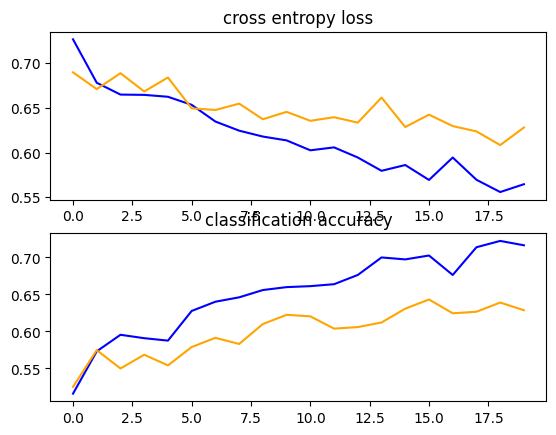

In [2]:
import sys
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator 

def define_model():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))


  model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))
  
  model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
 

  model.add(Dense(1,activation='sigmoid'))

  opt=SGD(lr=0.001,momentum=0.9)
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model

#plot diagnostic learning curves
def summary_diagnostics(history):
  #plot loss
  plt.subplot(211)
  plt.title("cross entropy loss")
  plt.plot(history.history['loss'],color='blue',label='train')
  plt.plot(history.history['val_loss'],color='orange',label='test')

  #plot accuracy
  plt.subplot(212)
  plt.title("classification accuracy")
  plt.plot(history.history['accuracy'],color='blue',label='train')
  plt.plot(history.history['val_accuracy'],color='orange',label='test')
  plt.show()

  #save plot to file
  filename=sys.argv[0].split('/')[-1]
  plt.savefig(filename+'_plot.png')
  plt.close()

# run test harness for evalutating model
def run_test_harness():
  #define model
  model=define_model()
  #create data generators
  train_datagen=ImageDataGenerator(rescale=1.0/255.0,
                                  width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
  test_datagen=ImageDataGenerator(rescale=1.0/255.0)

  #prepare iterators
  train_it=train_datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train1/',class_mode='binary',batch_size=64,target_size=(200,200))
  test_it=test_datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/test1/',class_mode='binary',batch_size=64,target_size=(200,200))

  #fit model
  history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20,verbose=1) 

  # evaluate the model
  _,acc=model.evaluate_generator(test_it,steps=len(test_it),verbose=1)
  print('> %.3f' % (acc*100.0))

  #learning curves
  summary_diagnostics(history)

#entry point,run test harness
run_test_harness()


- accuracy is 62%

# Transfer learning
- transfer learning involves using all or parts of a model trained on related task
- a useful model for transfer learning is one of the VGG models , such as VGG-16 with 16 layers achieved top results on imageNet photo classification challenge.

- model is comprised of two main parts, feature extractor ,part of model that is madeup of VGG blocks. and classifier part of model that is madeup of fully connected layers and output layer.

- we can use feature extraction as a part of model and add a new classifier part of model that is tailored to dogs and cats dataset. specifically we can hold the weights of all of the convolutional layers fixed during training, only train new fully connected layers that will learn to interpret the features extracted from the model and make binary classification
- this can be achieved by loading the VGG-16 model, removing fully connected layers from output end of the model, then adding new fully connected layers to interpret the model output and make a prediction, the classifier part of the model can be removed automatically by setting the `include_top` argument to `False`. which also requires that the shape of the input also be specified for model, in case (224,224,3). this means that the loaded model ends at last max pooling layer , after which we can manually add a Flatten layer and new classifier layers


In [ ]:
def define_model():
  #load model
  model=VGG16(include_top=False,input_shape=(224,224,3))
  #mark loaded layers as non trainable
  for layer in model.layers:
    layer.trainable=False
    # add new classifier layers
    flat1=Flatten()(model.layers[-1].output)#-1 refers to the last layer 
    class1=Dense(128,activation='relu',kernel_initializer='he_unfirom')(flat1)
    output=Dense(1,activation='sigmoid')(class1)
    #define new model
    model=Model(inputs=model.inputs,outputs=output)
    #compile model
    opt=SGD(lr=0.001,momentum=0.9)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model


- once we created, we can train the model as before the training dataset,  lot of training will be required in this case, as only new fully connected and output layer have trainable weights, as such we will fix number of training epochs at 10

- the vgg16 model was trained on a specific imagenet challenge dataset, it is configured to expected input images to have the shape 224x224 pixels, we will use this as target size when loading photos from dogs and cats dataset
- the model also epxects images to be centered, that is have the mean pixel values from each channel (red, green,blue) as calculated in image net training datset, subtraced from input
- kerasprovides a function to perform this preperatino for individual photos via preprocess_input() function ,
- we can achieve the same effect with `ImageDataGenerator` by setting the `featurewise_center=True` , manually specifying the mean pixel values to use when centering as mean values from imageNet training dataset : `[123.68,116.779]`
 

In [7]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.show()
  # save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train1/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/test1/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('accuracy a> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Found 1520 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


<ipython-input-7-6d500b002e6d>:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


Epoch 1/20
24/24 [==============================] - 17s 678ms/step - loss: 1.3555 - accuracy: 0.9243 - val_loss: 1.3887 - val_accuracy: 0.9315
Epoch 2/20
24/24 [==============================] - 21s 865ms/step - loss: 0.4421 - accuracy: 0.9737 - val_loss: 0.6716 - val_accuracy: 0.9544
Epoch 3/20
24/24 [==============================] - 15s 629ms/step - loss: 0.0291 - accuracy: 0.9954 - val_loss: 0.2774 - val_accuracy: 0.9689
Epoch 4/20
24/24 [==============================] - 24s 1s/step - loss: 5.5436e-04 - accuracy: 1.0000 - val_loss: 0.2866 - val_accuracy: 0.9647
Epoch 5/20
24/24 [==============================] - 19s 810ms/step - loss: 8.0578e-05 - accuracy: 1.0000 - val_loss: 0.3014 - val_accuracy: 0.9627
Epoch 6/20
24/24 [==============================] - 19s 786ms/step - loss: 3.3910e-05 - accuracy: 1.0000 - val_loss: 0.3010 - val_accuracy: 0.9627
Epoch 7/20
24/24 [==============================] - 22s 909ms/step - loss: 2.6087e-05 - accuracy: 1.0000 - val_loss: 0.2999 - val_acc

<ipython-input-7-6d500b002e6d>:64: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


> 96.473


- accuracy is 96.473%

In [13]:
from os import makedirs
from os import listdir
from shutil import copyfile

dataset_home='/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/finalize_dogs_vs_cats/'

# create label subdirectories
labeldirs=['dogs/','cats/']
for labeldir in labeldirs:
  new_dir=dataset_home+labeldir
  makedirs(new_dir,exist_ok=True)

#copy training dataset imags into subdirectrores
src_directory='/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/train'
for file in listdir(src_directory):
  src=src_directory+'/'+file
  if file.startswith('cat'):
    dest=dataset_home+'cats/'+file
    copyfile(src,dest)
  elif file.startswith('dog'):
    dest=dataset_home+'dogs/'+file
    copyfile(src,dest)

In [ ]:
train_it=datagen.f

# Save model

In [14]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/finalize_dogs_vs_cats/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=1)
	# save model
	model.save('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/final_model.h5')

# entry point, run the test harness
run_test_harness()

Found 2002 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-14-32b802eaa85f>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)


# make prediction 

In [8]:
#load and prepare the image
def load_image(filename):
  #load image
  img=load_img(filename,target_size=(224,224))
  #convert to array
  img=img_to_array(img)
  #reshape into a single sample with 3 channels
  img=img.reshape(1,224,224,3)
  #center pixel data
  img=img.astype('float32')
  img=img-[123.68,116.79,103.939]
  return img 

In [16]:
#make a prediction for a new image
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model

#load and prepare the image
def load_image(filename):
  #load image
  img=load_img(filename,target_size=(224,224))
  #convert to array
  img=img_to_array(img)
  #reshape into a single sample with 3 channels
  img=img.reshape(1,224,224,3)
  #center pixel data
  img=img.astype('float32')
  img=img-[123.68,116.79,103.939]
  return img 

#load a image and predict class
def run_example():
  img=load_image('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/sample_image.jpg')
  model=load_model('/content/drive/MyDrive/full-stack-datascience-ineuron/dog-vs-cats-problem-statement/dogs-vs-cats/final_model.h5')
  result=model.predict(img)
  print(result,result[0])

run_example()

1/1 [==============================] - 1s 813ms/step
[[1.]] [1.]
